In [27]:
import numpy as np
import matplotlib.pyplot as plt
from poke.thinfilms import compute_thin_films_broadcasted
from poke.polarization import fresnel_coefficients
from poke.materials import create_index_model

Enhancing reflectance in section 5.1.3 Macleod 

If a metal is overcoated with two quare waves of material indices $n_{1}$ and $n_{2}$, where $n_{2}$ is next to the metal. Then the reflectance is enhanced if the following conditions are met:

$$(\frac{n_{1}}{n_{2}})^{2} > 1$$

$$ (\frac{n_{1}}{n_{2}})^{2} < \frac{1}{n^{2} + k^{2}} $$

In [32]:
def quarter_wave_optical_thickness(n, wvl):
    return wvl / (8 * n)

def R_from_fresnel(rs,rp):
    return (np.abs(rs)**2 + np.abs(rp)**2) / 2

def A_from_fresnel(rs,rp):
    return np.angle(rs) - np.angle(rp)

# Build up a stack
wl = np.arange(0.4,1.8,0.001) # halpha ish
aoi = np.full_like(wl,np.radians(10))

# try and generate some index models
n_Ag = create_index_model('Ag')
n_HfO2 = create_index_model('HfO2')
n_SiO2 = create_index_model('SiO2')
n_MgF2 = create_index_model('MgF2')
n_Ta2O5 = create_index_model('Ta2O5')
n_Nb2O5 = create_index_model('Nb2O5')

In [43]:
# Try a simple silver layer
rs,rp = fresnel_coefficients(aoi,1,n_Ag(wl),mode='reflect')
R_bare_Ag = R_from_fresnel(rs,rp)
A_bare_Ag = A_from_fresnel(rs,rp)

# get the film thickness
wl_ref = 1.8 # um
d_film_Si = quarter_wave_optical_thickness(n_SiO2(wl_ref), wl_ref)
d_film_Mg = quarter_wave_optical_thickness(n_MgF2(wl_ref), wl_ref)
d_film_Ta = quarter_wave_optical_thickness(n_Ta2O5(wl_ref), wl_ref)
d_film_Nb = quarter_wave_optical_thickness(n_Nb2O5(wl_ref), wl_ref)

# create a stack
stack_TaSi = [
    (n_Ta2O5(wl),np.full_like(wl,d_film_Ta)),
    (n_SiO2(wl),np.full_like(wl,d_film_Si)),
    (n_Ag(wl))
]

stack_NbSi = [
    (n_Nb2O5(wl),np.full_like(wl,d_film_Nb)),
    (n_SiO2(wl),np.full_like(wl,d_film_Si)),
    (n_Ag(wl))
]

stack_TaMg = [
    (n_Ta2O5(wl),np.full_like(wl,d_film_Ta)),
    (n_MgF2(wl),np.full_like(wl,d_film_Mg)),
    (n_Ag(wl))
]

stack_NbMg = [
    (n_Nb2O5(wl),np.full_like(wl,d_film_Nb)),
    (n_MgF2(wl),np.full_like(wl,d_film_Mg)),
    (n_Ag(wl))
]

rs,_ = compute_thin_films_broadcasted(stack_TaSi,aoi,wl,substrate_index=n_Ag(wl),polarization='s')
rp,_ = compute_thin_films_broadcasted(stack_TaSi,aoi,wl,substrate_index=n_Ag(wl),polarization='p')
R_coated_TaSi = R_from_fresnel(rs,rp)

rs,_ = compute_thin_films_broadcasted(stack_NbSi,aoi,wl,substrate_index=n_Ag(wl),polarization='s')
rp,_ = compute_thin_films_broadcasted(stack_NbSi,aoi,wl,substrate_index=n_Ag(wl),polarization='p')
R_coated_NbSi = R_from_fresnel(rs,rp)

rs,_ = compute_thin_films_broadcasted(stack_TaMg,aoi,wl,substrate_index=n_Ag(wl),polarization='s')
rp,_ = compute_thin_films_broadcasted(stack_TaMg,aoi,wl,substrate_index=n_Ag(wl),polarization='p')
R_coated_TaMg = R_from_fresnel(rs,rp)

rs,_ = compute_thin_films_broadcasted(stack_NbMg,aoi,wl,substrate_index=n_Ag(wl),polarization='s')
rp,_ = compute_thin_films_broadcasted(stack_NbMg,aoi,wl,substrate_index=n_Ag(wl),polarization='p')
R_coated_NbMg = R_from_fresnel(rs,rp)

<__array_function__ internals>:200: ComplexWarning: Casting complex values to real discards the imaginary part


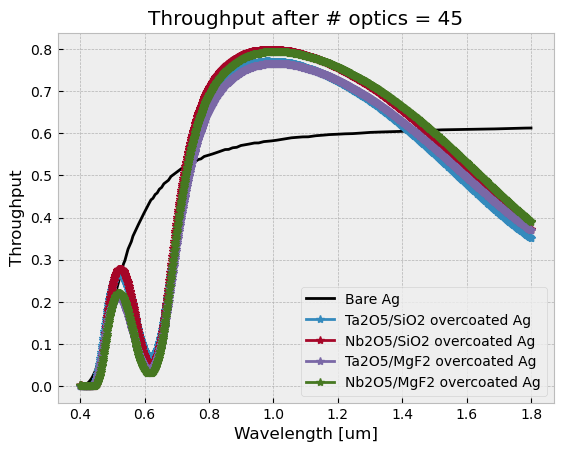

In [44]:
plt.style.use('bmh')
noptics = 45

plt.figure()
plt.title(f'Throughput after # optics = {noptics}')
plt.plot(wl,R_bare_Ag**noptics,label='Bare Ag',color='black')
plt.plot(wl,R_coated_TaSi**noptics,label='Ta2O5/SiO2 overcoated Ag',marker='*')
plt.plot(wl,R_coated_NbSi**noptics,label='Nb2O5/SiO2 overcoated Ag',marker='*')
plt.plot(wl,R_coated_TaMg**noptics,label='Ta2O5/MgF2 overcoated Ag',marker='*')
plt.plot(wl,R_coated_NbMg**noptics,label='Nb2O5/MgF2 overcoated Ag',marker='*')
# plt.plot(wl,R_coated_Ta**noptics,label='Ta overcoated Ag',marker='o')
# plt.plot(wl,R_coated_Nb**noptics,label='Nb overcoated Ag',marker='.')
plt.ylabel('Throughput')
plt.xlabel('Wavelength [um]')
plt.legend()

In [ ]:
np.savetxt('',delimiter=',')

In [ ]:
# save the reflection coefficients of the overcoated + single-layer as .txt 
# save with aluminum as a substrate
# check the polarization aberrations